In [2]:
# Importing Required Modules 
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set the random seeds. Do not change this!
seedVal = 41
random.seed(seedVal)
np.random.seed(seedVal)


In [3]:
!git clone https://github.com/Revanth980727/Computational-Physics-PHYS-5070.git

fatal: destination path 'Computational-Physics-PHYS-5070' already exists and is not an empty directory.


In [4]:
file_names = list()
true_label = list()
with open("/content/Computational-Physics-PHYS-5070/labels-map-proj-v3.txt",'r') as data_file:
    for line in data_file:
        data = line.split()
        file_names.append(data[0])
        true_label.append(data[1])
print(len(file_names))

73031


In [5]:
from pathlib import Path
dataset = list()
labels = list()
for i in range(0,len(file_names)):
    my_file = Path('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+file_names[i])
    #print(my_file)
    if my_file.is_file():
        img = cv2.imread('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+ file_names[i],0)
        dataset.append(img)
        labels.append(int(true_label[i]))
#print(counter)
print(len(dataset))
print(len(labels))

7495
7495


In [31]:
train_x = dataset[0:6000]
print(len(train_x))
#train_x = np.array(train_x)
train_y = labels[0:6000]
print(len(train_y))
#train_y = np.array(train_y)
test_x = dataset[6000:]
print(len(test_x))
#test_x = np.array(test_x)
test_y = labels[6000:]
test_set = test_x
print(len(test_y))
#test_y = np.array(test_y)

6000
6000
1495
1495


In [32]:
for i in range(6000):
  if train_y[i] == 1:
    for k in range(2):
      train_x.append(train_x[i])
      train_y.append(train_y[i])
  elif train_y[i] == 2 or train_y[i] == 6:
    for k in range(10):
      train_x.append(train_x[i])
      train_y.append(train_y[i])
  elif train_y[i] == 3 or train_y[i] == 4:
    for k in range(5):
      train_x.append(train_x[i])
      train_y.append(train_y[i])
  elif train_y[i] == 5:
    for k in range(29):
      train_x.append(train_x[i])
      train_y.append(train_y[i])
  elif train_y[i] == 7:
    for k in range(79):
      train_x.append(train_x[i])
      train_y.append(train_y[i])

In [33]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [34]:
import pandas as pd
df = pd.read_csv (r'/content/Computational-Physics-PHYS-5070/landmarks_map-proj-v3_classmap.csv',header = None, names = ['Label','Class'])
#print(df)
#print(df['Class'])
df.head()

,Label,Class
0,0,other
1,1,crater
2,2,dark dune
3,3,slope streak
4,4,bright dune


In [35]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2, y[i], ha = 'center')

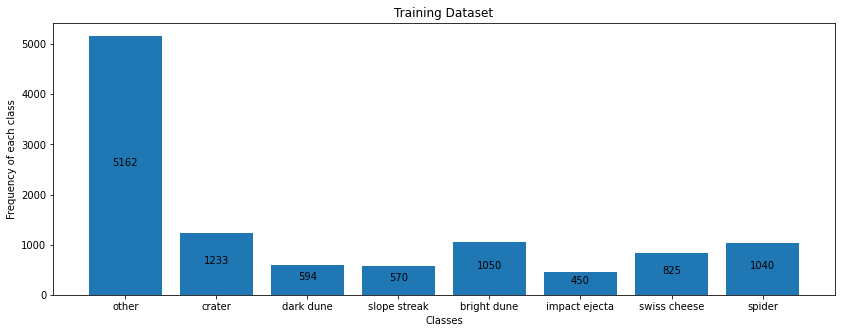

In [36]:
label_0 = len(train_y[train_y == 0])
label_1 = len(train_y[train_y == 1])
label_2 = len(train_y[train_y == 2])
label_3 = len(train_y[train_y == 3])
label_4 = len(train_y[train_y == 4])
label_5 = len(train_y[train_y == 5])
label_6 = len(train_y[train_y == 6])
label_7 = len(train_y[train_y == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4)

In [37]:
import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Define some constants.
NUM_CLASSES = 8
BATCH_SIZE = 16

In [38]:
print(train_x.shape)

(10924, 227, 227)


In [39]:
# Normalizing the dataset
train_x = keras.utils.all_utils.normalize(train_x, axis=1)
test_x = keras.utils.all_utils.normalize(test_x, axis=1)

# Class vectors are converted to binary class matrices
train_y = keras.utils.all_utils.to_categorical(train_y, NUM_CLASSES)
test_y =keras.utils.all_utils.to_categorical(test_y, NUM_CLASSES)
print(len(train_y[0]))

K.set_image_data_format('channels_first')

# Data reshape
train_x = train_x.reshape(train_x.shape[0], 1, 227, 227)
test_x =  test_x.reshape(test_x.shape[0], 1, 227, 227)

8


In [40]:
#from art.estimators.classification import KerasClassifier
# Training a CNN-based model using the NASA Dataset
nasa_model = Sequential()

# Define the intermediate layers.
nasa_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(1,227,227)))
nasa_model.add(Conv2D(64,(3,3), activation='relu'))
nasa_model.add(MaxPooling2D(pool_size=(2,2)))
nasa_model.add(Dropout(0.25))
nasa_model.add(Flatten())
nasa_model.add(Dense(128,activation='relu'))
nasa_model.add(Dropout(0.5))

nasa_model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
nasa_model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
#nasa_model = KerasClassifier(model=nasa_model, clip_values=(0,1))


# Fit the model
nasa_model.fit(train_x, train_y, epochs=18, batch_size=BATCH_SIZE)

Train on 10924 samples
Epoch 1/18
10924/10924 [==============================] - 163s 15ms/sample - loss: 1.3038 - accuracy: 0.5742
Epoch 2/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.7074 - accuracy: 0.7439
Epoch 3/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.4178 - accuracy: 0.8502
Epoch 4/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.2663 - accuracy: 0.9035
Epoch 5/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.1898 - accuracy: 0.9345
Epoch 6/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.1657 - accuracy: 0.9445
Epoch 7/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.1417 - accuracy: 0.9532
Epoch 8/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.1085 - accuracy: 0.9659
Epoch 9/18
10924/10924 [==============================] - 152s 14ms/sample - loss: 0.0720 - accuracy: 0.9

In [41]:
# Testing model on test dataset

predictions = nasa_model.predict(test_x)
count = 0
freq = dict()
incorrect = dict()
survey = dict()
for i in range(test_x.shape[0]):
  if np.where(predictions[i] == max(predictions[i]))[0][0] == np.where(test_y[i] == max(test_y[i]))[0][0]:
    class_type = np.where(predictions[i] == max(predictions[i]))[0][0]
    if class_type not in freq:
      freq[class_type] = i
      survey[class_type] = 1
    survey[class_type] += 1
    count+=1
  else:
    class_type = np.where(test_y[i] == max(test_y[i]))[0][0]
    if class_type not in incorrect:
      incorrect[class_type] = i
      survey[class_type] = 0
accuracy = count/test_x.shape[0]
print('Accuracy of the model = {}'.format(accuracy))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of the model = 0.7444816053511706
